<a href="https://colab.research.google.com/github/Jett987/Machine_Learning/blob/main/DS_Salaries_Clustering_Preprocessed_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 7 CMPSC-4983-01 Dr. Reddy's Machine Learning
(all coding was referenced from Dr. Reddy's Data Preprocessing lecture video, Data Preprocessing Example, and Clustering Example.)

# Assignment 7: Machine Learning (CMPSC-4983-01)  

### Jett McDowell

#Please Scroll to $Assignment$ $7$ $Beginning$

#Removing Missing Values:

The dataset I will be using is Data Science Salaries. The dataset doesn't appear to contain significant amounts of missing data, but I will use the following lines of code to confirm that.

First, I will import the dataset and establish the column names.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Jett987/Machine_Learning/main/ds_salaries_removed.csv', header=None)
data.columns = ['work_year', 'experience_level', 'employment_type', 'job_title','salary', 'salary_currency', 'salary_in_usd', 'employee_residence','remote_ratio', 'company_location','company_size']

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
data.head()

Total Number of Records: 3755
Total Number of Features: 11


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will check the dataset for missing values. The dataset I am using does not appear to have any missing values, but the following lines of code will confirm that.

In [2]:
import numpy as np

data = data.replace('?',np.NaN)

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
print('Total Number of missing values:')
for col in data.columns:
    print('\n%s: %d' % (col,data[col].isna().sum()))

Total Number of Records: 3755
Total Number of Features: 11
Total Number of missing values:

work_year: 0

experience_level: 0

employment_type: 0

job_title: 0

salary: 0

salary_currency: 0

salary_in_usd: 0

employee_residence: 0

remote_ratio: 0

company_location: 0

company_size: 0


The next line of code is an additional way to check for missing data. Again, the results display no missing data.

In [3]:
print('Total number of rows before removing missing values: %d' % (data.shape[0]))

data2 = data.dropna()
print('Total number of rows after dropping missing values: %d' % (data2.shape[0]))

Total number of rows before removing missing values: 3755
Total number of rows after dropping missing values: 3755


#Checking for Outliers:

Next, I will use box plots to check for any outliers. The first line of code will display the data type associated with each column. I have to make sure the data type is numeric when creating a box plot.

In [4]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Next, I will drop any non-numeric data types, and I will plot the numeric data to check for outliers.

In [5]:
%matplotlib inline

data2 = data.drop(['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size'],axis=1)
data2.dtypes


work_year        int64
salary           int64
salary_in_usd    int64
remote_ratio     int64
dtype: object

After removing the columns that contained strings, each column contains numeric values.

<Axes: >

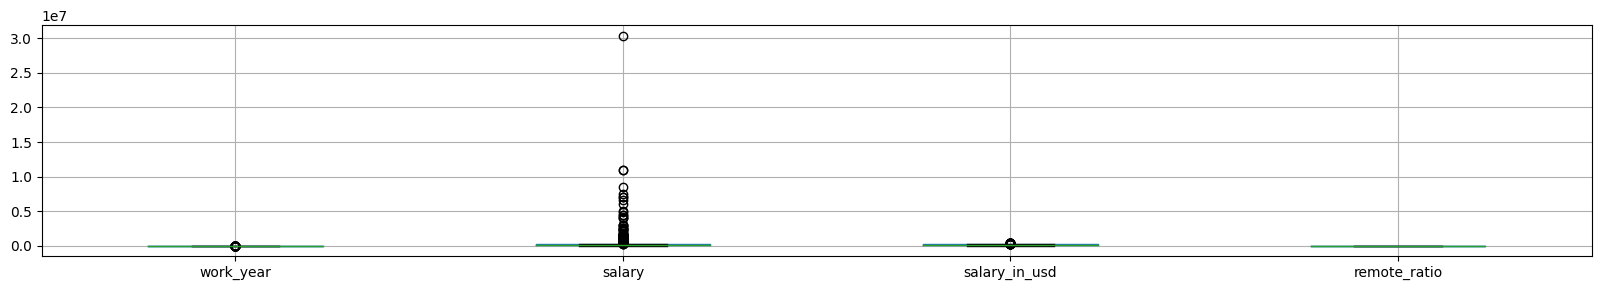

In [6]:
data2.boxplot(figsize=(20,3))

When evaluating the boxplot listed above, the only outliers appear to be in the $salary$ column. Next, I will attempt to resolve the outliers with the following lines of code.

In [7]:
Z = (data2-data2.mean())/data2.std()
Z[1:3755]

,work_year,salary,salary_in_usd,remote_ratio
1,0.905874,-0.239245,-1.705960,1.105771
2,0.905874,-0.245945,-1.777326,1.105771
3,0.905874,-0.023368,0.593597,1.105771
4,0.905874,-0.105252,-0.278649,1.105771
5,0.905874,0.046904,1.342142,-0.952306
...,...,...,...,...
3750,-3.432846,0.329481,4.352183,1.105771
3751,-1.986606,-0.059099,0.212980,1.105771
3752,-3.432846,-0.127585,-0.516534,1.105771
3753,-3.432846,-0.135029,-0.595829,1.105771


In [8]:
print('Total number of rows before removing outliers: %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Total number of rows after removing missing values: %d' % (Z2.shape[0]))

Total number of rows before removing outliers: 3755
Total number of rows after removing missing values: 0


It appears as though the outliers don't exceed the maximum or minimum.

#Checking for Duplicates:

Next, I will now check for duplicated rows.

In [9]:
dups = data.duplicated()
print('Total number of duplicate rows: %d' % (dups.sum()))

Total number of duplicate rows: 1171


There appears to be a lot of duplicated rows, so I will attempt to remove them with the following line of code.

In [10]:
print('Total number of rows before removing duplicates: %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Total number of rows after removing duplicates: %d' % (data2.shape[0]))

Total number of rows before removing duplicates: 3755
Total number of rows after removing duplicates: 2584


#Sampling:

Next, I will execute sampling to review the data. First, I'll start with the first five rows.

In [11]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will sample three rows without replacement.

In [12]:
sample = data.sample(n=3)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3381,2022,SE,FT,Data Analyst,69000,USD,69000,US,100,US,M
3551,2021,SE,FT,Data Analytics Engineer,67000,EUR,79197,DE,100,DE,L
20,2023,MI,FT,Data Analyst,110000,USD,110000,US,100,US,M


Next, I will sample at one percent of the data without replacement.

In [13]:
sample = data.sample(frac=0.01, random_state=1)
sample


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2101,2022,SE,FT,Data Scientist,130000,USD,130000,US,0,US,M
2586,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
3096,2022,MI,FT,Data Engineer,50000,GBP,61566,GB,0,GB,M
1677,2023,SE,FT,Data Scientist,297300,USD,297300,US,100,US,M
3661,2021,SE,FT,Data Analytics Engineer,50000,USD,50000,VN,100,GB,M
2508,2022,SE,FT,Data Operations Analyst,123000,USD,123000,US,0,US,M
846,2023,MI,FT,Research Scientist,150000,USD,150000,US,100,US,M
796,2023,MI,FT,Data Analytics Manager,140000,USD,140000,US,0,US,M
3138,2020,EN,FT,Data Analyst,20000,EUR,22809,PT,100,PT,M
102,2023,SE,FT,Data Analyst,65000,USD,65000,US,0,US,M


Lastly, I will sample one percent with replacement.

In [14]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1061,2023,SE,FT,Data Manager,120000,USD,120000,US,0,US,M
235,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
1096,2023,SE,FT,Data Engineer,172800,USD,172800,US,0,US,M
905,2023,SE,FT,Machine Learning Engineer,142200,USD,142200,US,0,US,M
2763,2022,SE,FT,Machine Learning Engineer,135000,USD,135000,PR,100,PR,M
3717,2021,SE,FT,Data Engineer,65000,EUR,76833,RO,50,GB,S
2895,2022,SE,FT,Data Scientist,141525,USD,141525,US,100,US,M
960,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M
144,2023,SE,FT,Data Analyst,138900,USD,138900,US,0,US,M
129,2023,MI,FT,Data Analytics Manager,155000,USD,155000,US,0,US,M


#Findings:

The dataset I am using for clustering doesn’t appear to contain missing values, outliers, or duplicates. The sampling lines of code confirmed the previous lines of code by randomly selecting rows and displaying the data within those rows. The dataset appeared mostly clean to begin with, and after attempting preprocessing, it appears as though that observation is correct.

#Assignment 7 Beginning

This project will focus on unsupervised learning, as there is no target variable.

First, I will import the packages I need to successfully complete the project.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

Next, I will check the shape of the dataset.

In [16]:
data2.shape

(2584, 11)

As you can see, there are 2584 records and 11 features. Next, I will display the first five records.

In [17]:
data2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will display the data types within the dataset.

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


Next, I will check for any null values.

In [19]:
data2.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Next, I will display statistical data pertaining to the dataset.

In [20]:
data2.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Next, I will evaluate the "object" data types within the dataset since they represent categorical assignments.

In [21]:
data2['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [22]:
len(data2['experience_level'].unique())

4

In [23]:
data2['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [24]:
len(data2['employment_type'].unique())

4

In [25]:
data2['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [26]:
len(data2['job_title'].unique())

93

In [27]:
data2['salary_currency'].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [28]:
len(data2['salary_currency'].unique())

20

In [29]:
data2['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [30]:
len(data2['employee_residence'].unique())

78

In [31]:
data2['remote_ratio'].unique()

array([100,   0,  50])

In [32]:
len(data2['remote_ratio'].unique())

3

In [33]:
data2['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [34]:
len(data2['company_location'].unique())

72

In [35]:
data2['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [36]:
len(data2['company_size'].unique())

3

The previous line of code demonstrate variables with a high record count. I will drop the variables with the higher record count and evaluate the variables with a lower record count.

In [37]:
data2.drop(['job_title','salary_currency','employee_residence','company_location','employment_type','company_size'],axis=1,inplace=True)

Next, I will display the data types again, and focus on $experience$ $level$.

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         2584 non-null   int64 
 1   experience_level  2584 non-null   object
 2   salary            2584 non-null   int64 
 3   salary_in_usd     2584 non-null   int64 
 4   remote_ratio      2584 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 121.1+ KB


In [39]:
data2.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio
0,2023,SE,80000,85847,100
1,2023,MI,30000,30000,100
2,2023,MI,25500,25500,100
3,2023,SE,175000,175000,100
4,2023,SE,120000,120000,100


Next, I will declare the future vector and variable I will be evaluating further.

In [40]:
X = data2

y = data2['experience_level']

Now I will convert the object variable into an integer.

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['experience_level'] = le.fit_transform(X['experience_level'])

y = le.transform(y)

Now that it's been converted and assigned to "X" we can view the data types again.

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         2584 non-null   int64
 1   experience_level  2584 non-null   int64
 2   salary            2584 non-null   int64
 3   salary_in_usd     2584 non-null   int64
 4   remote_ratio      2584 non-null   int64
dtypes: int64(5)
memory usage: 121.1 KB


In [43]:
X.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio
0,2023,3,80000,85847,100
1,2023,2,30000,30000,100
2,2023,2,25500,25500,100
3,2023,3,175000,175000,100
4,2023,3,120000,120000,100


Next, I will establish feature scaling.

In [44]:
cols = X.columns

In [45]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [46]:
X = pd.DataFrame(X, columns=[cols])

In [47]:
X.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio
0,1.0,1.000000,0.002435,0.181436,1.0
1,1.0,0.666667,0.000790,0.055900,1.0
2,1.0,0.666667,0.000642,0.045784,1.0
3,1.0,1.000000,0.005560,0.381839,1.0
4,1.0,1.000000,0.003751,0.258207,1.0


Now, I can establish the K-Means model with two clusters.

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

Next, I will establish K-Means model with parameters study.

In [49]:
kmeans.cluster_centers_

array([[0.69952038, 0.7498801 , 0.00813268, 0.26923911, 0.93561151],
       [0.84561697, 0.82607482, 0.0050838 , 0.31059604, 0.00335008]])

Next, I will calculate inertia.

In [50]:
kmeans.inertia_

511.2655959466043

Next, I will check the quality of the classification by the model.

In [51]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 241 out of 2584 samples were correctly labeled.


In [52]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.09


As you can see, the accuracy was 9%

Next, I will apply the elbow method in an attempt to find the optimal number of clusters.

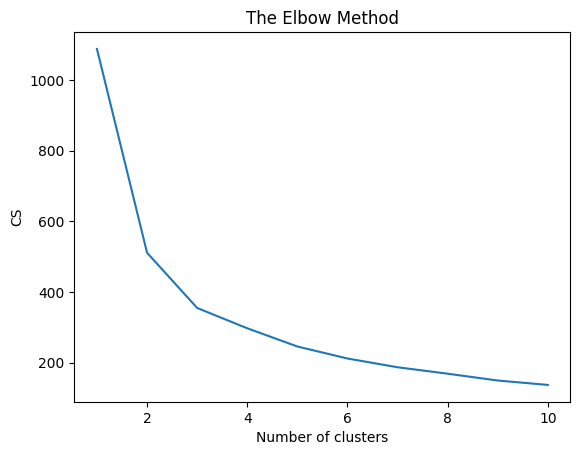

In [53]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


As you can see, there is a kind first beginning around 2.

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 241 out of 2584 samples were correctly labeled.
Accuracy score: 0.09


Next, I will begin checking different clusters using the K-Means model to try to obtain a better accuracy.

In [55]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 62 out of 2584 samples were correctly labeled.
Accuracy score: 0.02


In [56]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 823 out of 2584 samples were correctly labeled.
Accuracy score: 0.32


As you can see, 4 clusters has the highest accuracy.

#Findings

Using the elbow method, I could evaluate the data and determine an approximate k value. When viewing the inertia value, the results demonstrate a high value, thus making it a poor model for the data. Using the k equals 2, the accuracy was still weak at nine percent. Ultimately the best result was k equals 4, resulting in an accuracy of 32 percent.

#References:

Chainika Thakar Blog: https://blog.quantinsti.com/data-preprocessing/

Dr. Reddy's examples: https://blackboard.ecok.edu/webapps/blackboard/execute/displayLearningUnit?course_id=_24357_1&content_id=_2338686_1&framesetWrapped=true

https://blackboard.ecok.edu/ultra/courses/_24357_1/cl/outline